In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [ ]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0
5,Female,20.0,0.0,0.0,never,27.32,6.6,85.0,0.0
6,Female,44.0,0.0,0.0,never,19.31,6.5,200.0,1.0
7,Female,79.0,0.0,0.0,No Info,23.86,5.7,85.0,0.0
8,Male,42.0,0.0,0.0,never,33.64,4.8,145.0,0.0
9,Female,32.0,0.0,0.0,never,27.32,5.0,100.0,0.0


In [ ]:
data.shape

(55046, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55046 entries, 0 to 55045
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55046 non-null  object 
 1   age                  55046 non-null  float64
 2   hypertension         55045 non-null  float64
 3   heart_disease        55045 non-null  float64
 4   smoking_history      55045 non-null  object 
 5   bmi                  55045 non-null  float64
 6   HbA1c_level          55045 non-null  float64
 7   blood_glucose_level  55045 non-null  float64
 8   diabetes             55045 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.8+ MB


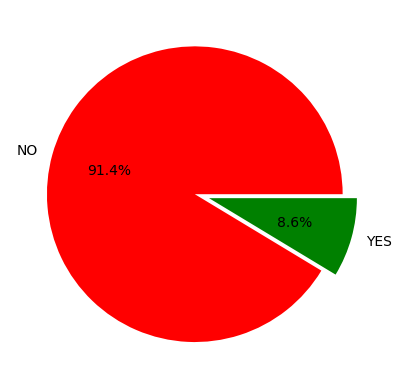

In [ ]:
plt.pie(data['diabetes'].value_counts().values, explode = (0,0.1), labels = ["NO","YES"], colors = ['red','green'], autopct = '%1.1f%%')
plt.show()

In [ ]:
data_num=data.select_dtypes(include=np.number)
data_num

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0.0,1.0,25.19,6.6,140.0,0.0
1,54.0,0.0,0.0,27.32,6.6,80.0,0.0
2,28.0,0.0,0.0,27.32,5.7,158.0,0.0
3,36.0,0.0,0.0,23.45,5.0,155.0,0.0
4,76.0,1.0,1.0,20.14,4.8,155.0,0.0
...,...,...,...,...,...,...,...
55041,70.0,0.0,0.0,26.88,5.8,140.0,1.0
55042,13.0,0.0,0.0,20.54,4.0,140.0,0.0
55043,52.0,0.0,0.0,29.05,6.1,140.0,0.0
55044,47.0,0.0,0.0,27.32,4.5,160.0,0.0


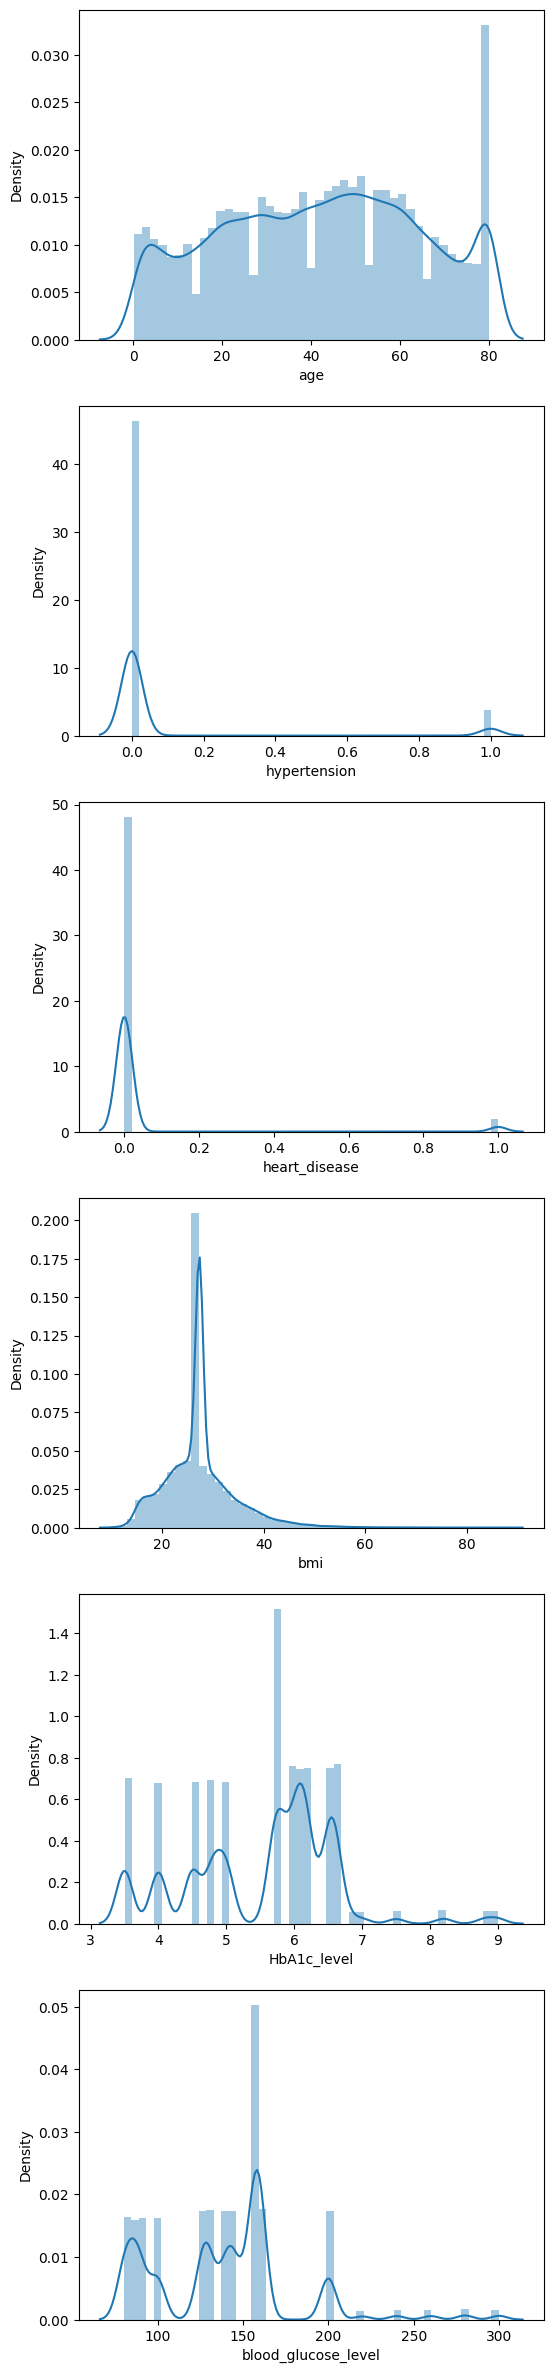

In [ ]:
fig, axs = plt.subplots(6,1,figsize=(6,30))
plt1=sns.distplot(data['age'],ax=axs[0])
plt1=sns.distplot(data['hypertension'],ax=axs[1])
plt1=sns.distplot(data['heart_disease'],ax=axs[2])
plt1=sns.distplot(data['bmi'],ax=axs[3])
plt1=sns.distplot(data[ 'HbA1c_level'],ax=axs[4])
plt1=sns.distplot(data['blood_glucose_level'],ax=axs[5])
plt.show()


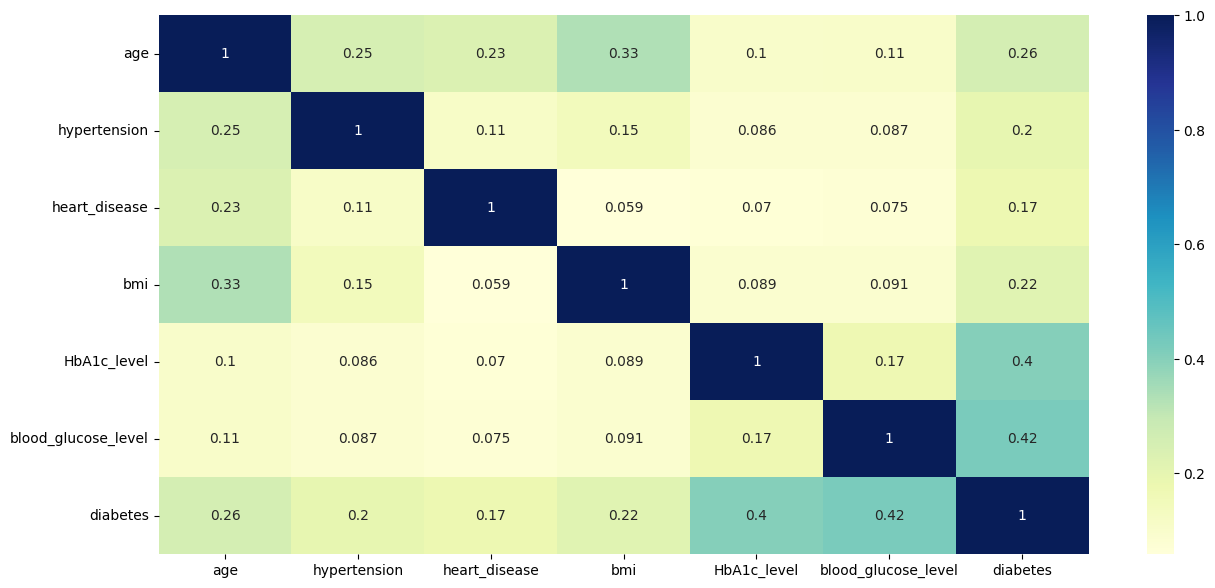

In [ ]:
plt.figure(figsize=(15,7))
dataplot = sns.heatmap(data_num.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
data_obj=data.select_dtypes(include=object).columns
data_obj

Index(['gender', 'smoking_history'], dtype='object')

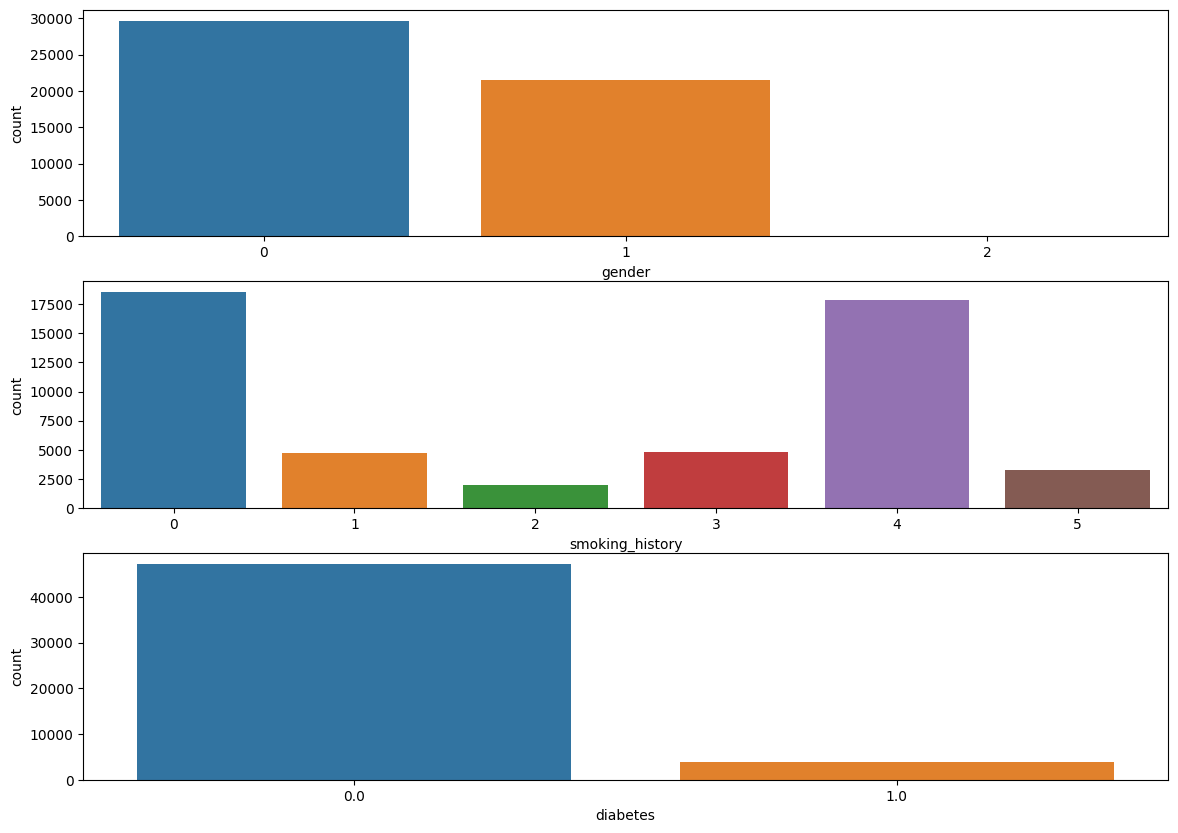

In [ ]:
fig, ax = plt.subplots(3, 1, figsize = (14, 10))

cols = ['gender', 'smoking_history','diabetes']
for i ,val in enumerate(cols):
    sns.countplot(x = val, data = data, ax = ax[i])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['gender', 'smoking_history']
for i in cols:
    data[i]=le.fit_transform(data[i])

In [ ]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0.0,1.0,4,25.19,6.6,140.0,0.0
1,0,54.0,0.0,0.0,0,27.32,6.6,80.0,0.0
2,1,28.0,0.0,0.0,4,27.32,5.7,158.0,0.0
3,0,36.0,0.0,0.0,1,23.45,5.0,155.0,0.0
4,1,76.0,1.0,1.0,1,20.14,4.8,155.0,0.0
5,0,20.0,0.0,0.0,4,27.32,6.6,85.0,0.0
6,0,44.0,0.0,0.0,4,19.31,6.5,200.0,1.0
7,0,79.0,0.0,0.0,0,23.86,5.7,85.0,0.0
8,1,42.0,0.0,0.0,4,33.64,4.8,145.0,0.0
9,0,32.0,0.0,0.0,4,27.32,5.0,100.0,0.0


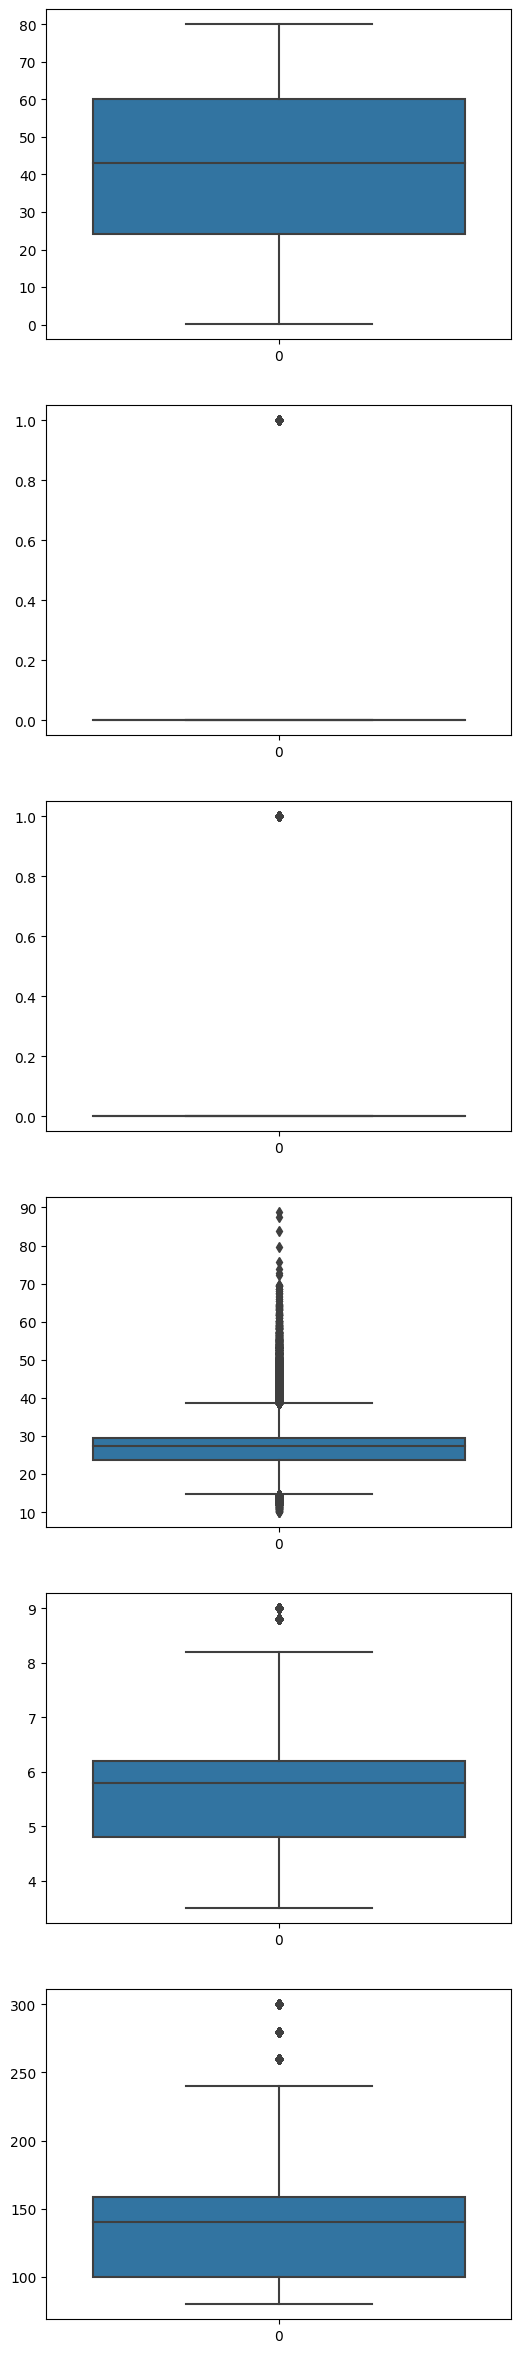

In [ ]:
fig, axs = plt.subplots(6,1,figsize=(6,30))
plt1=sns.boxplot(data['age'],ax=axs[0])
plt1=sns.boxplot(data['hypertension'],ax=axs[1])
plt1=sns.boxplot(data['heart_disease'],ax=axs[2])
plt1=sns.boxplot(data['bmi'],ax=axs[3])
plt1=sns.boxplot(data[ 'HbA1c_level'],ax=axs[4])
plt1=sns.boxplot(data['blood_glucose_level'],ax=axs[5])
plt.show()

<Axes: >

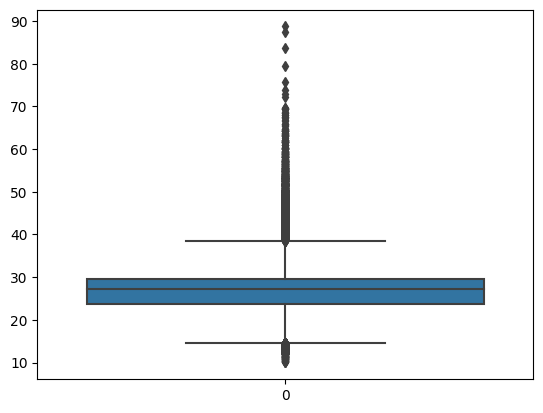

In [ ]:
sns.boxplot(data["bmi"])

In [ ]:
Q1=data["bmi"].quantile(0.25)
Q3=data["bmi"].quantile(0.75)
IQR=Q3-Q1
IQR

5.970000000000002

In [ ]:
u_bound=Q3+1.5*IQR
l_bound=Q1-1.5*IQR

In [ ]:
print(u_bound,l_bound)

38.55500000000001 14.674999999999995


In [ ]:
data=data[(data['bmi']>=l_bound) & (data['bmi']<=u_bound)]

data.columns

<Axes: >

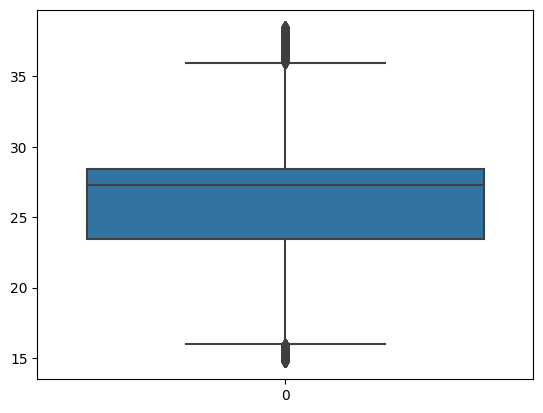

In [ ]:
sns.boxplot(data['bmi'])

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
x1=data[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level']]
y1=data['diabetes']

In [ ]:
score=chi2(x1,y1)
score

(array([6.38310778e+01, 3.92693928e+04, 1.67593882e+03, 1.57033000e+03,
        6.00233694e+02, 1.39322298e+03, 1.56817033e+03, 1.01253404e+05]),
 array([1.35558150e-015, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.48925403e-132, 6.23868205e-305, 0.00000000e+000, 0.00000000e+000]))

In [ ]:
p_val=pd.Series(score[1],index=x1.columns)
p_val

gender                  1.355582e-15
age                     0.000000e+00
hypertension            0.000000e+00
heart_disease           0.000000e+00
smoking_history        1.489254e-132
bmi                    6.238682e-305
HbA1c_level             0.000000e+00
blood_glucose_level     0.000000e+00
dtype: float64

In [ ]:
irr=[]
for x in p_val.index:
    if p_val[x]<=0.5:
        print(x,"Reject NUll hypo")
    else:
        print(x,"accept Null hypo")
        irr.append(x)

gender Reject NUll hypo
age Reject NUll hypo
hypertension Reject NUll hypo
heart_disease Reject NUll hypo
smoking_history Reject NUll hypo
bmi Reject NUll hypo
HbA1c_level Reject NUll hypo
blood_glucose_level Reject NUll hypo


In [ ]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0.0,1.0,4,25.19,6.6,140.0,0.0
1,0,54.0,0.0,0.0,0,27.32,6.6,80.0,0.0
2,1,28.0,0.0,0.0,4,27.32,5.7,158.0,0.0
3,0,36.0,0.0,0.0,1,23.45,5.0,155.0,0.0
4,1,76.0,1.0,1.0,1,20.14,4.8,155.0,0.0
5,0,20.0,0.0,0.0,4,27.32,6.6,85.0,0.0
6,0,44.0,0.0,0.0,4,19.31,6.5,200.0,1.0
7,0,79.0,0.0,0.0,0,23.86,5.7,85.0,0.0
8,1,42.0,0.0,0.0,4,33.64,4.8,145.0,0.0
9,0,32.0,0.0,0.0,4,27.32,5.0,100.0,0.0


In [ ]:
X = data.drop('diabetes', axis = 1)
y = data['diabetes']

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38360, 8), (12787, 8), (38360,), (12787,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 35)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=35)

In [ ]:
pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("f1 Score: ", f1_score(y_test, pred))
print("auc Score: ", roc_auc_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy Score:  0.9734104950340189
f1 Score:  0.8004694835680751
auc Score:  0.8336594911937378
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     11765
         1.0       1.00      0.67      0.80      1022

    accuracy                           0.97     12787
   macro avg       0.99      0.83      0.89     12787
weighted avg       0.97      0.97      0.97     12787



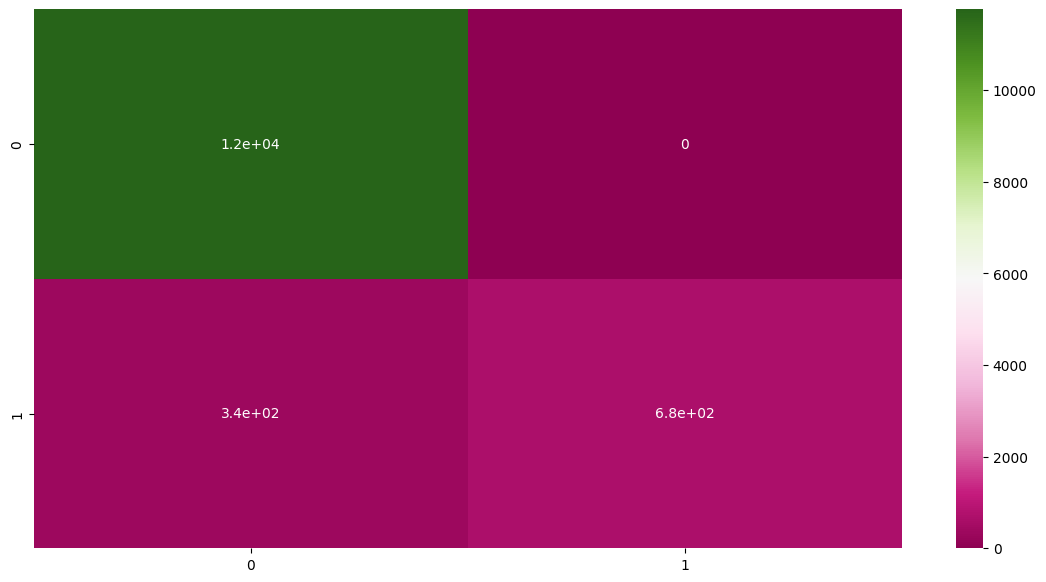

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, cmap = 'PiYG')
plt.show()

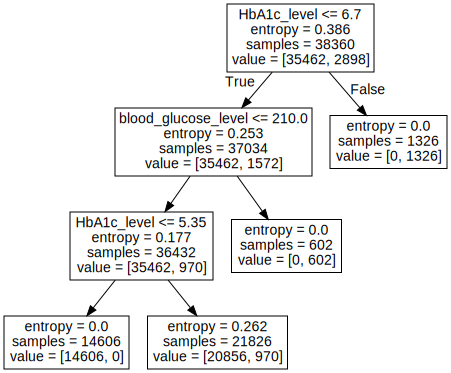

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dt, feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

In [ ]:
# saving the model
import pickle
pickle_out = open("Diabetes_Prediction_System.pkl", mode = "wb")
pickle.dump(dt, pickle_out)
pickle_out.close()